<a href="https://colab.research.google.com/github/AriesAnon/i-SenseCNN/blob/main/Meat_Quality_Assessment_TL_Test_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Documentation for Transfer Learning using the Meat Quality Assessment from Kaggle***
[link for the dataset](https://www.kaggle.com/crowww/meat-quality-assessment-based-on-deep-learning)

[link for the youtube tutorial for TL](https://www.youtube.com/watch?v=sTVgH-R_Q5o&t=274s&ab_channel=CSbySahilSharma)

Code below from: [github](https://github.com/sahil301290/Deep-Learning/blob/master/Lab%20Codes/07.%20Transfer%20Learning/Lab_7_Transfer_Learning.ipynb)


# **Conclusion: The dataset might not be good or the optimization of the neural network.**

**Advice: Try a different dataset with multiple classes instead of binary to simulate the final dataset. Last test would be the dataset with the three different kinds of meat. Fine tune that dataset and imitate the code and if possible add more into the dataset different kinds of pictures of the different cuts of specific meat.**


# ***Epochs: 100***

In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Add the following arguments in the `pre_trained_model.load_weights` to prevent the error:**


```
# pre_trained_model.load_weights(local_weights_file, by_name=True)
```
Note to self: I do not know what this does except for the fact that it prevents the error where the weights does not match.


In [ ]:
path_inception = f"{getcwd()}/../content/drive/MyDrive/CNNRelatedFolders/TransferLearningModels/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top  = False,
                               weights      = None)

pre_trained_model.load_weights(local_weights_file, by_name=True)  # by_name=True argument is added to avoid conflict in weights

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
      layer.trainable = False

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation = 'sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                                                  
 batch_normalization_12 (BatchN  (None, 16, 16, 64)  192         ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 16, 16, 64)  192         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 16, 16, 96)  288         ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

In [ ]:
#Getting the dataset from the drive
path_dataset = f"{getcwd()}/../content/drive/MyDrive/CNNRelatedFolders/Datasets/meat_quality_assessment_dataset.zip"


# **Below is the part where most of the code will be changed to match the custom dataset**

Changes include:
*   Apple -> Spoiled
*   Banana -> Fresh
*   Name of the path folders as well as other texts to follow the changes above

# **Code below is for deleting folders**



```
# import shutil

shutil.rmtree('/folder_name')  # change to folder name
```



# **Added path to the `zip.extractall()` as an argument to extract files in that specific folder**
Note: you have to create the folder first; I am unsure if this will still work if the folder does not exist:

Confirmed: You skip creating the folder first before running.

Folder name: MQA; abbrev. for Meat Quality Assessment

Delete any other unnecessary files like .txt files.

In [ ]:
#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall('../content/MQA')  # added a path to extract all of the files in the dataset zip
  print('Done')

#Defining dataset path and finding number of files
import os 
Spoiled = os.path.join('../content/MQA/Spoiled')
Fresh = os.path.join('../content/MQA/Fresh')
print('Total Spoiled Images:',len(os.listdir(Spoiled)))
print('Total Fresh Images:',len(os.listdir(Fresh)))

Done
Total Spoiled Images: 948
Total Fresh Images: 948


# *I am unsure if the code below is needed... Regardless, here it is*

In [ ]:
#List of Spoiled and Fresh Images
Spoiled_files = os.listdir(Spoiled)
print(Spoiled_files[:10])
Fresh_files = os.listdir(Fresh)
print(Fresh_files[:10])

['test_20171019_002321D.jpg', 'test_20171018_084321D.jpg', 'test_20171019_015321D.jpg', 'test_20171018_081721D.jpg', 'test_20171018_203721D.jpg', 'test_20171018_172321D.jpg', 'test_20171018_203121D.jpg', 'test_20171018_031921D.jpg', 'test_20171018_034121D.jpg', 'test_20171018_213121D.jpg']
['test_20171016_195121D.jpg', 'test_20171017_162121D.jpg', 'test_20171017_152721D.jpg', 'test_20171016_232921D.jpg', 'test_20171016_181521D.jpg', 'test_20171016_203921D.jpg', 'test_20171017_010521D.jpg', 'test_20171017_051521D.jpg', 'test_20171016_203521D.jpg', 'test_20171017_153121D.jpg']


# *The code below makes two copies (test and train) of the original dataset for training and testing*
The no. of images in both folders are equal to the original since it is yet to be divided.

In [ ]:
#Train-Test Partitioning
from glob import glob
import os.path
from shutil import copy2

path = '../content/MQA'  # the path of the dataset
test = '../content/Test'  # new folder for the test dataset
train = '../content/Train'  # new folder for the training dataset

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)
 
for folder in glob(path+'/*'):
		print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)

../content/MQA/Spoiled
no of images in this folder: 948
../content/MQA/Fresh
no of images in this folder: 948


# *This divides the dataset into 80% for training and 20% for testing*

In [ ]:
# Define our example directories and files
train_dir = '/content/Train'
validation_dir = '/content/Test'

train_spoiled_dir = os.path.join(train_dir,'Spoiled')
train_fresh_dir = os.path.join(train_dir,'Fresh')
validation_spoiled_dir = os.path.join(validation_dir,'Spoiled')
validation_fresh_dir = os.path.join(validation_dir,'Fresh')

train_spoiled_fnames = os.listdir(train_spoiled_dir)
train_fresh_fnames = os.listdir(train_fresh_dir)
validation_spoiled_fnames = os.listdir(validation_spoiled_dir)
validation_fresh_fnames = os.listdir(validation_fresh_dir)

print(len(train_spoiled_fnames))
print(len(train_fresh_fnames))
print(len(validation_spoiled_fnames))
print(len(validation_fresh_fnames))

#Expected Output: depends on the dataset size
#759
#759
#189
#189

759
759
189
189


# ***Change the code below and try to get a higher accuracy. It might be because the images are bad. Try to optimize this and use other datasets.***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Expected Output: not accurate
# Found 787 images belonging to 2 classes.
# Found 195 images belonging to 2 classes.

Found 1518 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.0%
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True 

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99% accuracy

callbacks = myCallback()
history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch = 10,
                             epochs = 100,
                             validation_steps = 10,
                             verbose = 1,
                             callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
10/10 [==============================] - 27s 2s/step - loss: 0.6923 - acc: 0.5100 - val_loss: 0.6910 - val_acc: 0.5150
Epoch 2/100
10/10 [==============================] - 22s 2s/step - loss: 0.6814 - acc: 0.5850 - val_loss: 0.6995 - val_acc: 0.4800
Epoch 3/100
10/10 [==============================] - 21s 2s/step - loss: 0.6920 - acc: 0.5200 - val_loss: 0.6976 - val_acc: 0.4700
Epoch 4/100
10/10 [==============================] - 21s 2s/step - loss: 0.6934 - acc: 0.5050 - val_loss: 0.6854 - val_acc: 0.5450
Epoch 5/100
10/10 [==============================] - 21s 2s/step - loss: 0.6944 - acc: 0.4650 - val_loss: 0.6924 - val_acc: 0.4550
Epoch 6/100
10/10 [==============================] - 21s 2s/step - loss: 0.6887 - acc: 0.5202 - val_loss: 0.6881 - val_acc: 0.5150
Epoch 7/100
10/10 [==============================] - 21s 2s/step - loss: 0.6911 - acc: 0.4850 - val_loss: 0.6906 - val_acc: 0.4750
Epoch 8/100
10/10 [==============================] - 21s 2s/step - loss: 0.6880 - a

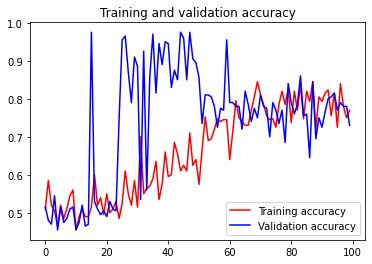

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# **Conclusion: The dataset might not be good or the optimization of the neural network.**

**Advice: Try a different dataset with multiple classes instead of binary to simulate the final dataset. Last test would be the dataset with the three different kinds of meat. Fine tune that dataset and imitate the code and if possible add more into the dataset different kinds of pictures of the different cuts of specific meat.**